In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the dataset
data = pd.read_csv('heart.csv')

# Display the first few rows
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:

# Check for missing values
data.info()

# Statistical summary
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


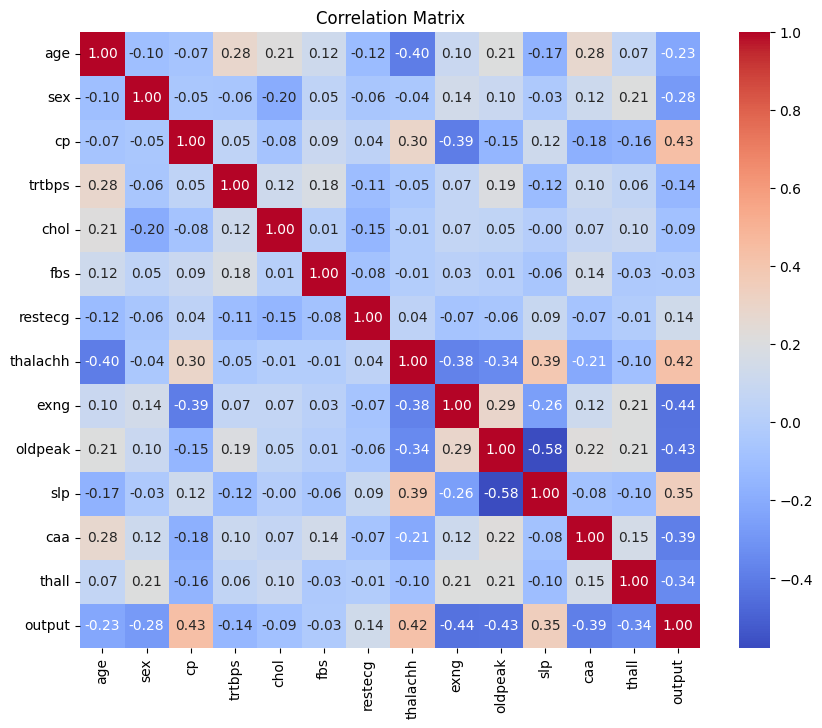

In [4]:

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [5]:

# Separate features and target variable
X = data.drop(columns=['output'])
y = data['output']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (optional, for certain models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:

# Define extended list of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis()
}

# Train each model and store results
results = []
roc_auc_scores = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    results.append({"Model": model_name, "Accuracy": accuracy})
    if roc_auc is not None:
        roc_auc_scores.append({"Model": model_name, "ROC AUC Score": roc_auc})
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    if roc_auc is not None:
        print(f"{model_name} - ROC AUC Score: {roc_auc:.2f}")
    print(classification_report(y_test, y_pred))


Logistic Regression - Accuracy: 0.85
Logistic Regression - ROC AUC Score: 0.93
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Random Forest - Accuracy: 0.87
Random Forest - ROC AUC Score: 0.92
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Support Vector Machine - Accuracy: 0.87
Support Vector Machine - ROC AUC Score: 0.93
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
      

c:\Users\Lionel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


XGBoost - Accuracy: 0.82
XGBoost - ROC AUC Score: 0.91
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Naive Bayes - Accuracy: 0.87
Naive Bayes - ROC AUC Score: 0.89
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

LDA - Accuracy: 0.87
LDA - ROC AUC Score: 0.94
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy     

In [7]:

# Save accuracy results to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('accuracy_results.csv', index=False)
print("Accuracy results saved to 'accuracy_results.csv'.")

# Save ROC AUC scores to a CSV file
if roc_auc_scores:
    roc_auc_df = pd.DataFrame(roc_auc_scores)
    roc_auc_df.to_csv('roc_auc_scores.csv', index=False)
    print("ROC AUC scores saved to 'roc_auc_scores.csv'.")


Accuracy results saved to 'accuracy_results.csv'.
ROC AUC scores saved to 'roc_auc_scores.csv'.


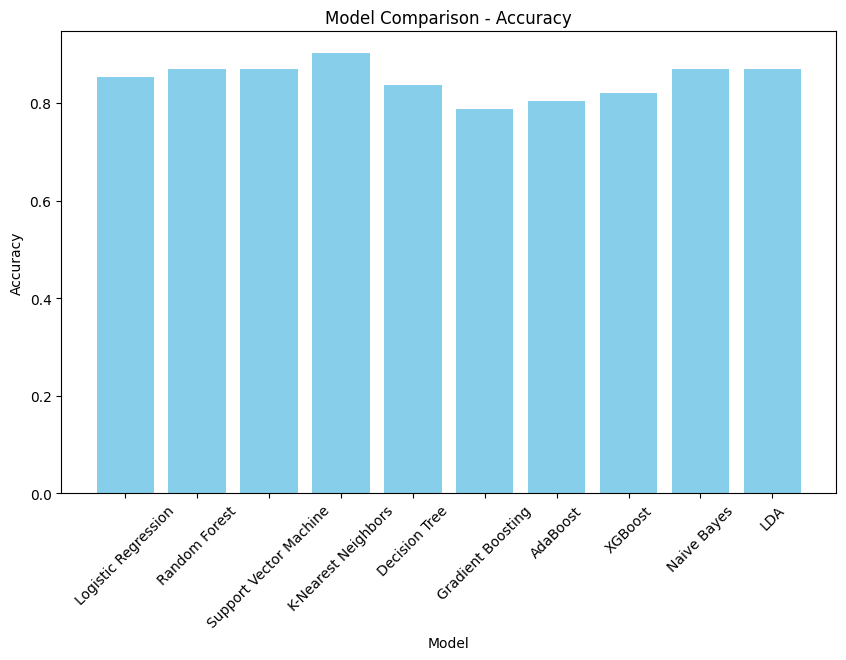

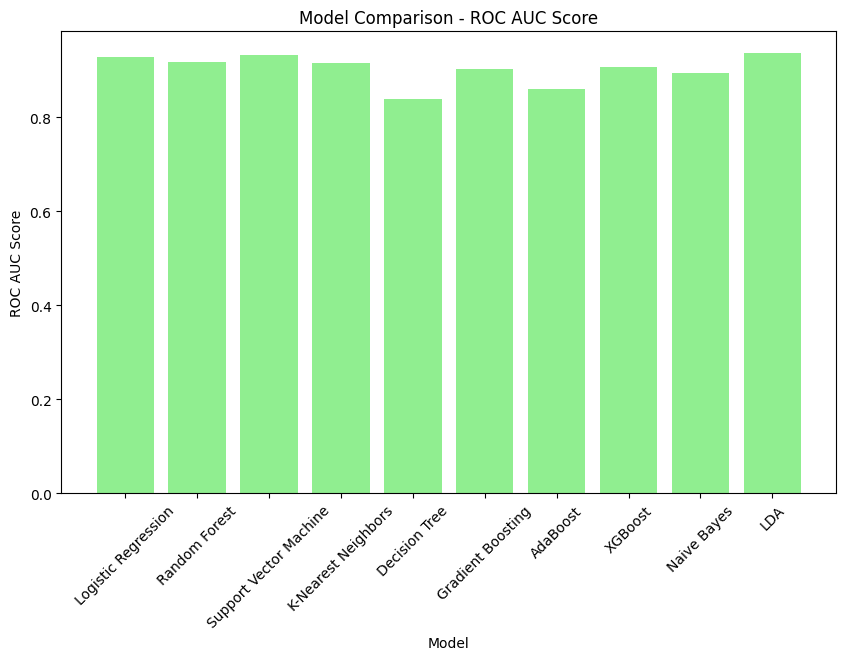

In [8]:

# Plot model accuracies
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xticks(rotation=45)
plt.show()

# Plot ROC AUC scores if available
if roc_auc_scores:
    roc_auc_df = pd.DataFrame(roc_auc_scores)
    plt.figure(figsize=(10, 6))
    plt.bar(roc_auc_df['Model'], roc_auc_df['ROC AUC Score'], color='lightgreen')
    plt.xlabel('Model')
    plt.ylabel('ROC AUC Score')
    plt.title('Model Comparison - ROC AUC Score')
    plt.xticks(rotation=45)
    plt.show()


In [9]:

# Find the best model by accuracy
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"The best model is {best_model['Model']} with an accuracy of {best_model['Accuracy']:.2f}.")


The best model is K-Nearest Neighbors with an accuracy of 0.90.
